## Exploratory Data Analysys

### Exploring the images

In [9]:
import matplotlib.pyplot as plt
import cv2
import pandas as pd

# System 
import sys
sys.path.append('..')

import importlib
%load_ext autoreload
%autoreload 2


from utils import load_bboxes as bboxes

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


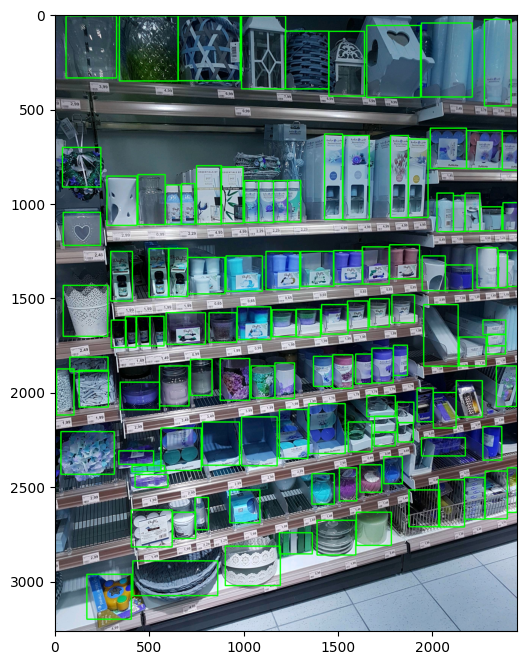

In [8]:
%matplotlib inline
fig,ax = plt.subplots(figsize = (12,8))
img0 = bboxes.plot_bounding_boxes('train_150.jpg')

##### Plotting multiple images at once

### Failed images

Images where not all products were labeled

In [16]:
tags_df = pd.DataFrame()

# Reading in chunks
for chunk_df in bboxes.read_csv_chunks(chunksize=50000):
    tags_df = pd.concat( [tags_df,chunk_df] , ignore_index = True)

tags_df

,img_name,x1,y1,x2,y2,type,height,width
0,train_0.jpg,208,537,422,814,object,3024,3024
1,train_0.jpg,1268,1923,1365,2209,object,3024,3024
2,train_0.jpg,1135,2074,1261,2166,object,3024,3024
3,train_0.jpg,1045,2085,1122,2258,object,3024,3024
4,train_0.jpg,976,2036,1040,2177,object,3024,3024
...,...,...,...,...,...,...,...,...
1208477,train_999.jpg,422,2386,675,2542,object,2336,4160
1208478,train_999.jpg,427,2581,667,2715,object,2336,4160
1208479,train_999.jpg,699,2365,823,2474,object,2336,4160
1208480,train_999.jpg,1849,1678,2108,1769,object,2336,4160


In [50]:
# Count images with less that `TAG_THRESH` tags
TAG_THRESH = 50

n_tags_per_image = tags_df.groupby('img_name').size().sort_values()
failed_tags = n_tags_per_image[n_tags_per_image < TAG_THRESH]
print('Number of failed images: ', failed_tags.shape[0])
failed_tags

Number of failed images:  26


img_name
train_3029.jpg     1
train_6566.jpg     6
train_3622.jpg    11
train_2555.jpg    16
train_6216.jpg    18
train_7880.jpg    19
train_6477.jpg    23
train_6107.jpg    24
train_7716.jpg    25
train_7259.jpg    26
train_5842.jpg    28
train_85.jpg      29
train_701.jpg     31
train_7082.jpg    34
train_1296.jpg    36
train_1172.jpg    37
train_6138.jpg    38
train_7352.jpg    39
train_7584.jpg    40
train_68.jpg      43
train_5131.jpg    43
train_104.jpg     44
train_3983.jpg    45
train_2194.jpg    47
train_1724.jpg    48
train_890.jpg     48
dtype: int64

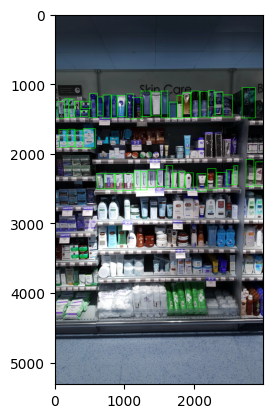

In [51]:
_ = bboxes.plot_bounding_boxes(img_name= failed_tags.index[-1])

* Image sizes 
* General statistics 
* Histograms and barplots